In [13]:
"""Sonar item classification."""
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

In [14]:
def load_data(filename):
    """Load the dataset and preprocess it with improved feature selection."""
    data = pd.read_csv(filename, header=None)
    data[60] = data[60].apply(lambda x: 1 if x == 'M' else 0)

    # Use a lower correlation threshold to keep more potentially useful features
    matrix = data.corr()
    correlation_threshold = 0.1
    relevant_features = matrix[60][abs(matrix[60]) > correlation_threshold].index.tolist()

    data = data[relevant_features]
    return data.drop(columns=[60]), data[60]

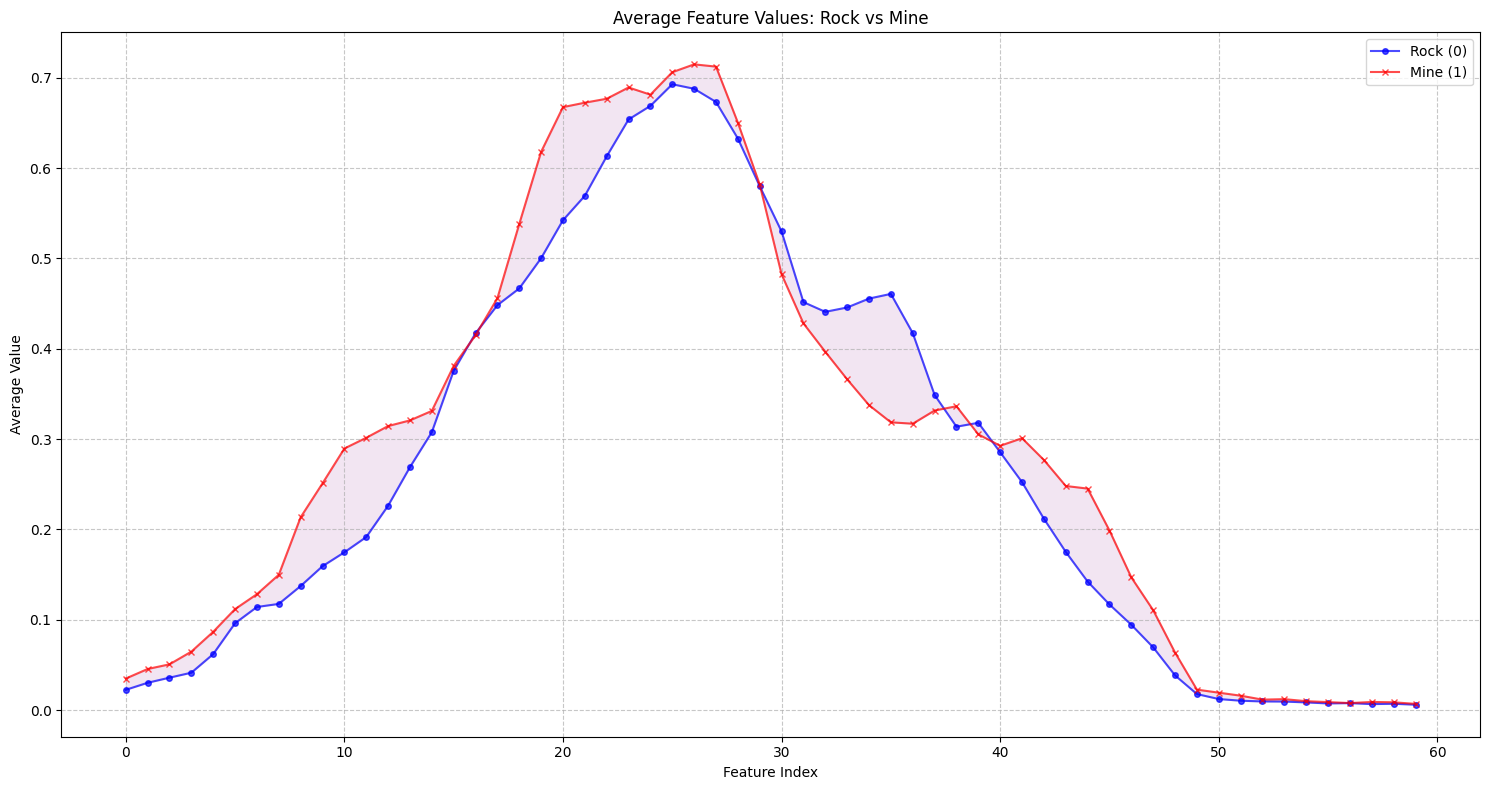

In [15]:
# Add a numeric target column
df['target_numeric'] = df[60].apply(lambda x: 1 if x == 'M' else 0)

# Mean feature values across all features for rock and mine samples
rock_mean = df[df['target_numeric'] == 0].iloc[:, 0:60].mean()
mine_mean = df[df['target_numeric'] == 1].iloc[:, 0:60].mean()
x = range(60)

plt.figure(figsize=(15, 8))
plt.plot(x, rock_mean, label='Rock (0)', color='blue', marker='o', markersize=4, alpha=0.7)
plt.plot(x, mine_mean, label='Mine (1)', color='red', marker='x', markersize=4, alpha=0.7)
plt.fill_between(x, rock_mean, mine_mean, color='purple', alpha=0.1)
plt.xlabel('Feature Index')
plt.ylabel('Average Value')
plt.title('Average Feature Values: Rock vs Mine')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

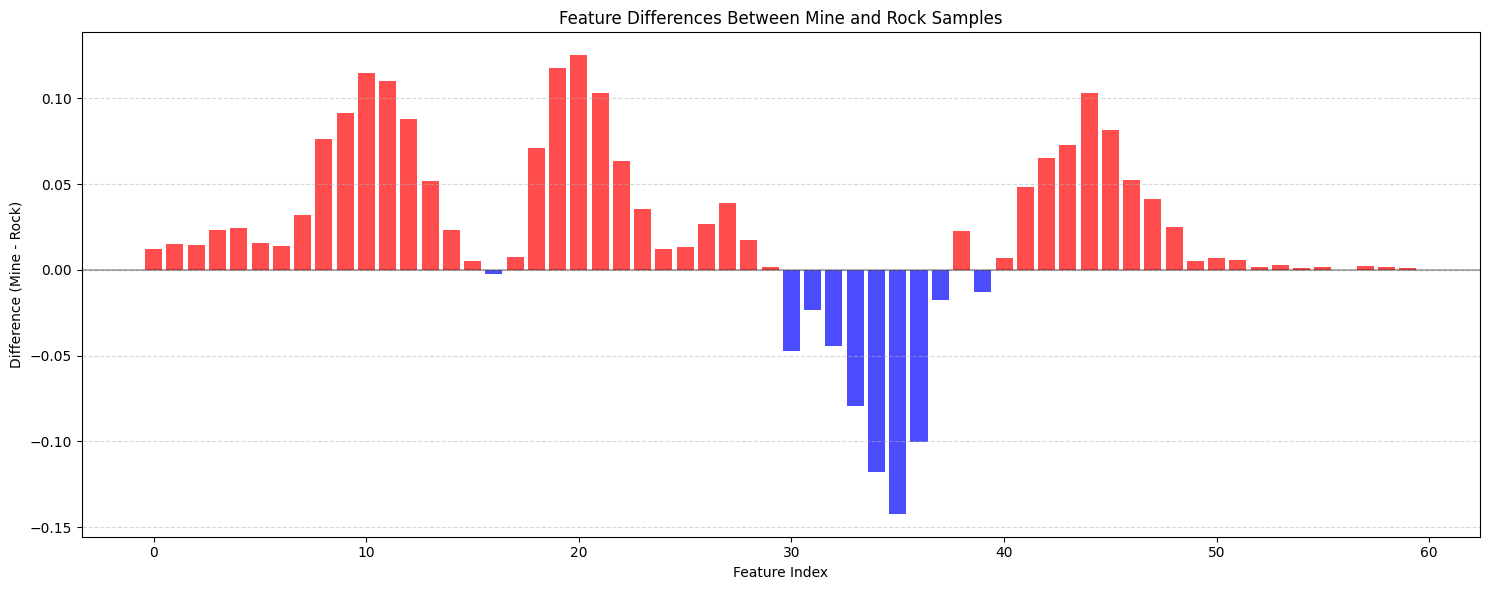

In [16]:
# Feature differences between mine and rock samples
plt.figure(figsize=(15, 6))
difference = mine_mean - rock_mean
colors = ['red' if val > 0 else 'blue' for val in difference]
plt.bar(x, difference, color=colors, alpha=0.7)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.xlabel('Feature Index')
plt.ylabel('Difference (Mine - Rock)')
plt.title('Feature Differences Between Mine and Rock Samples')
plt.grid(True, linestyle='--', alpha=0.5, axis='y')
plt.tight_layout()
plt.show()

In [17]:
def train_models(models, X, y):
    """Train multiple models by finding optimal random splits."""
    for name, model in models.items():
        flag = True
        counter = 0
        threshold = 0.99
        print(f"\nTraining {name}...")

        while flag:
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.2)
            model.fit(X_train, y_train)
            score = model.score(X_test, y_test)
            counter += 1

            if counter % 100 == 0:
                threshold *= 0.99
                print(
                    f"Reducing threshold to {threshold:.4f} after {counter} iterations")

            if score >= threshold:
                flag = False
                print(
                    f"{name} achieved accuracy: {score:.3f} (iterations: {counter})")

            # Add a safety exit condition to prevent infinite loops
            if counter >= 10000:
                print(
                    f"{name} stopped after {counter} iterations. Best score: {score:.3f}")
                flag = False

    return models

In [18]:
def main():
    """Run the model using the split-until-success approach."""
    X, y = load_data("datasets/sonar.all-data")

    # Initialize models with the specified classifiers
    models = {
        'LogisticRegression': LogisticRegression(random_state=42),
        'DecisionTree': DecisionTreeClassifier(random_state=42),
        'KNN': KNeighborsClassifier(),
        'LDA': LinearDiscriminantAnalysis(),
        'NaiveBayes': GaussianNB(),
        'SVM': SVC(probability=True, random_state=42)
    }

    trained_models = train_models(models, X, y)

    return trained_models

main()


Training LogisticRegression...
Reducing threshold to 0.9801 after 100 iterations
Reducing threshold to 0.9703 after 200 iterations
Reducing threshold to 0.9606 after 300 iterations
Reducing threshold to 0.9510 after 400 iterations
LogisticRegression achieved accuracy: 0.952 (iterations: 434)

Training DecisionTree...
Reducing threshold to 0.9801 after 100 iterations
Reducing threshold to 0.9703 after 200 iterations
Reducing threshold to 0.9606 after 300 iterations
Reducing threshold to 0.9510 after 400 iterations
Reducing threshold to 0.9415 after 500 iterations
Reducing threshold to 0.9321 after 600 iterations
Reducing threshold to 0.9227 after 700 iterations
Reducing threshold to 0.9135 after 800 iterations
Reducing threshold to 0.9044 after 900 iterations
Reducing threshold to 0.8953 after 1000 iterations
Reducing threshold to 0.8864 after 1100 iterations
Reducing threshold to 0.8775 after 1200 iterations
DecisionTree achieved accuracy: 0.905 (iterations: 1284)

Training KNN...
Red

{'LogisticRegression': LogisticRegression(random_state=42),
 'DecisionTree': DecisionTreeClassifier(random_state=42),
 'KNN': KNeighborsClassifier(),
 'LDA': LinearDiscriminantAnalysis(),
 'NaiveBayes': GaussianNB(),
 'SVM': SVC(probability=True, random_state=42)}